start
finish initialize
this is formapx [-1.00000000e+01 -9.80000000e+00 -9.60000000e+00 -9.40000000e+00
 -9.20000000e+00 -9.00000000e+00 -8.80000000e+00 -8.60000000e+00
 -8.40000000e+00 -8.20000000e+00 -8.00000000e+00 -7.80000000e+00
 -7.60000000e+00 -7.40000000e+00 -7.20000000e+00 -7.00000000e+00
 -6.80000000e+00 -6.60000000e+00 -6.40000000e+00 -6.20000000e+00
 -6.00000000e+00 -5.80000000e+00 -5.60000000e+00 -5.40000000e+00
 -5.20000000e+00 -5.00000000e+00 -4.80000000e+00 -4.60000000e+00
 -4.40000000e+00 -4.20000000e+00 -4.00000000e+00 -3.80000000e+00
 -3.60000000e+00 -3.40000000e+00 -3.20000000e+00 -3.00000000e+00
 -2.80000000e+00 -2.60000000e+00 -2.40000000e+00 -2.20000000e+00
 -2.00000000e+00 -1.80000000e+00 -1.60000000e+00 -1.40000000e+00
 -1.20000000e+00 -1.00000000e+00 -8.00000000e-01 -6.00000000e-01
 -4.00000000e-01 -2.00000000e-01 -3.55271368e-14  2.00000000e-01
  4.00000000e-01  6.00000000e-01  8.00000000e-01  1.00000000e+00
  1.20000000e+00  1.40000000e+00  1.60000000e+00  

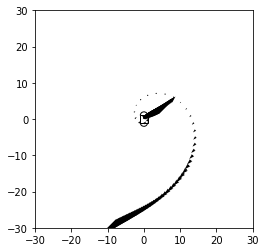

In [14]:
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

print ("start")

#create iterable for function mapping
formapx=np.arange(-10,10,0.2)
# formapy= [0]*len(formapx)
formapy=np.arange(-10,10,0.2)
print ("finish initialize")
print ("this is formapx",formapx)
print ("this is formapy",formapy)

formap = []
xval = []
yval = []
 


#this is a matrix used for testing, 
#it mimics the minutae points represented at the 0th index
# and the type of points at the first index
#complex numbers will be implemented
# and there will also likely be an import for the dataset model
minutiaArray= [[1+2j,1],[2-1j,0],[1+3j,1],[5+3j,1],[2+1j,0],[4+2j,1],[3-5j,0],[2-3j,0],[2-4j,1]]

#function for modelling the direction field 
def complexfunction(x,minutiaArray):
    val=1
    for i in range(0,len(minutiaArray)):
        if(minutiaArray[i][1]==1):
            val=val*(x-minutiaArray[i][0])
        if(minutiaArray[i][1]==0):
            val=val/(x-minutiaArray[i][0])
    return val
    
print (complexfunction(2,minutiaArray))
print ("into loop1")

i = 0
while i < len(formapx):
    formap.append(complex(formapx[i],formapy[i]))
#     print(complex(formapx[i],formapy[i]))
    i+=1

print ("into loop2")    
for z in formap:
    xval.append(complexfunction(z,minutiaArray).real)
    yval.append(complexfunction(z,minutiaArray).imag)






#plotting the fingerprint
fig, ax = plt.subplots()
ax.axis([-30,30,-30,30])
patch = []

#these width and height parameters will be updated once the script for
#including all of the minutiae has been implemented
xcenter, ycenter = 0,0
width, height = 2,2
angle= 0




fig = plt.figure()
e1 = patches.Arc((xcenter, ycenter+height/2), width, height,
                     angle,theta1=0.0,theta2=90.0)
e2 = patches.Arc((xcenter, ycenter+height/2), width, height,
                     angle,theta1=90,theta2=180)
e3 = patches.Arc((xcenter, ycenter-height/2), width, height,
                     angle,theta1=180,theta2=270)
e4 = patches.Arc((xcenter, ycenter-height/2), width, height,
                     theta1=270,theta2=0)
r1= patches.Rectangle((xcenter-width/2, ycenter-height/2), width, height,
                     angle,fill=False)
#p = PatchCollection(patch)
#ax.add_collection(p)
ax.add_patch(e1)
ax.add_patch(e4)
ax.add_patch(e3)
ax.add_patch(e2)
ax.add_patch(r1)

#quiverplot will eventually be used with the arrays from the function
ax.quiver(xval,yval,formapx,formapy)
# ax.quiver(xval,yval)
ax.set_aspect('equal','box')
plt.show()